In [1]:
! conda install pygraphviz -y

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - anaconda
 - pyg
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ebutz/miniconda3/envs/pyg

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.6.2           |  py310h06a4308_0         160 KB
    ------------------------------------------------------------
                                           Total:         160 KB

The following packages will be UPDATED:

  certifi                          2024.2.2-py310h06a4308_0 --> 2024.6.2-py310h06a4308_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
! conda install colorspacious -y

Channels:
 - defaults
 - conda-forge
 - anaconda
 - pyg
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ebutz/miniconda3/envs/pyg

  added / updated specs:
    - colorspacious


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    colorspacious-1.1.2        |  py310h2f386ee_0          63 KB
    ------------------------------------------------------------
                                           Total:          63 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  colorspacious      conda-forge/noarch::colorspacious-1.1~ --> pkgs/main/linux-64::colorspacious-1.1.2-py310h2f386ee_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [6]:
! pip install pydot

  Using cached pydot-2.0.0-py3-none-any.whl.metadata (9.6 kB)
Using cached pydot-2.0.0-py3-none-any.whl (22 kB)


In [7]:
import networkx as nx
import nxontology 
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np
import pydot
import matplotlib as mpl

from networkx.drawing.nx_pydot import graphviz_layout

In [18]:
import networkx as nx
import nxontology

# Création du graphe dirigé
G = nx.DiGraph()
nodes = ['Animals', 
         'Fish', 'Feline', 'Domesticable',
         'Dog','Cat','Tiger', 'Trut']
edges = [('Animals','Fish'), ('Animals','Feline'), ('Animals','Domesticable'),
         ('Fish','Trut'), ('Domesticable','Dog'), ('Domesticable','Cat'), ('Feline','Cat'), ('Feline', 'Tiger')]
[G.add_node(node) for node in nodes]

G.add_edges_from(edges)

# Création de l'ontologie
tree = nxontology.NXOntology(G)

# Calcul de la lin-similarité pour chaque nœud par rapport à 'Cat' et stockage dans un dictionnaire
similarity_dict = {node: tree.similarity('Cat', node).lin for node in nodes}

print(similarity_dict)


{'Animals': 0.0, 'Fish': 0.0, 'Feline': 0.7958800173440752, 'Domesticable': 0.7958800173440752, 'Dog': 0.6767162082159431, 'Cat': 1.0, 'Tiger': 0.6767162082159431, 'Trut': 0.0}


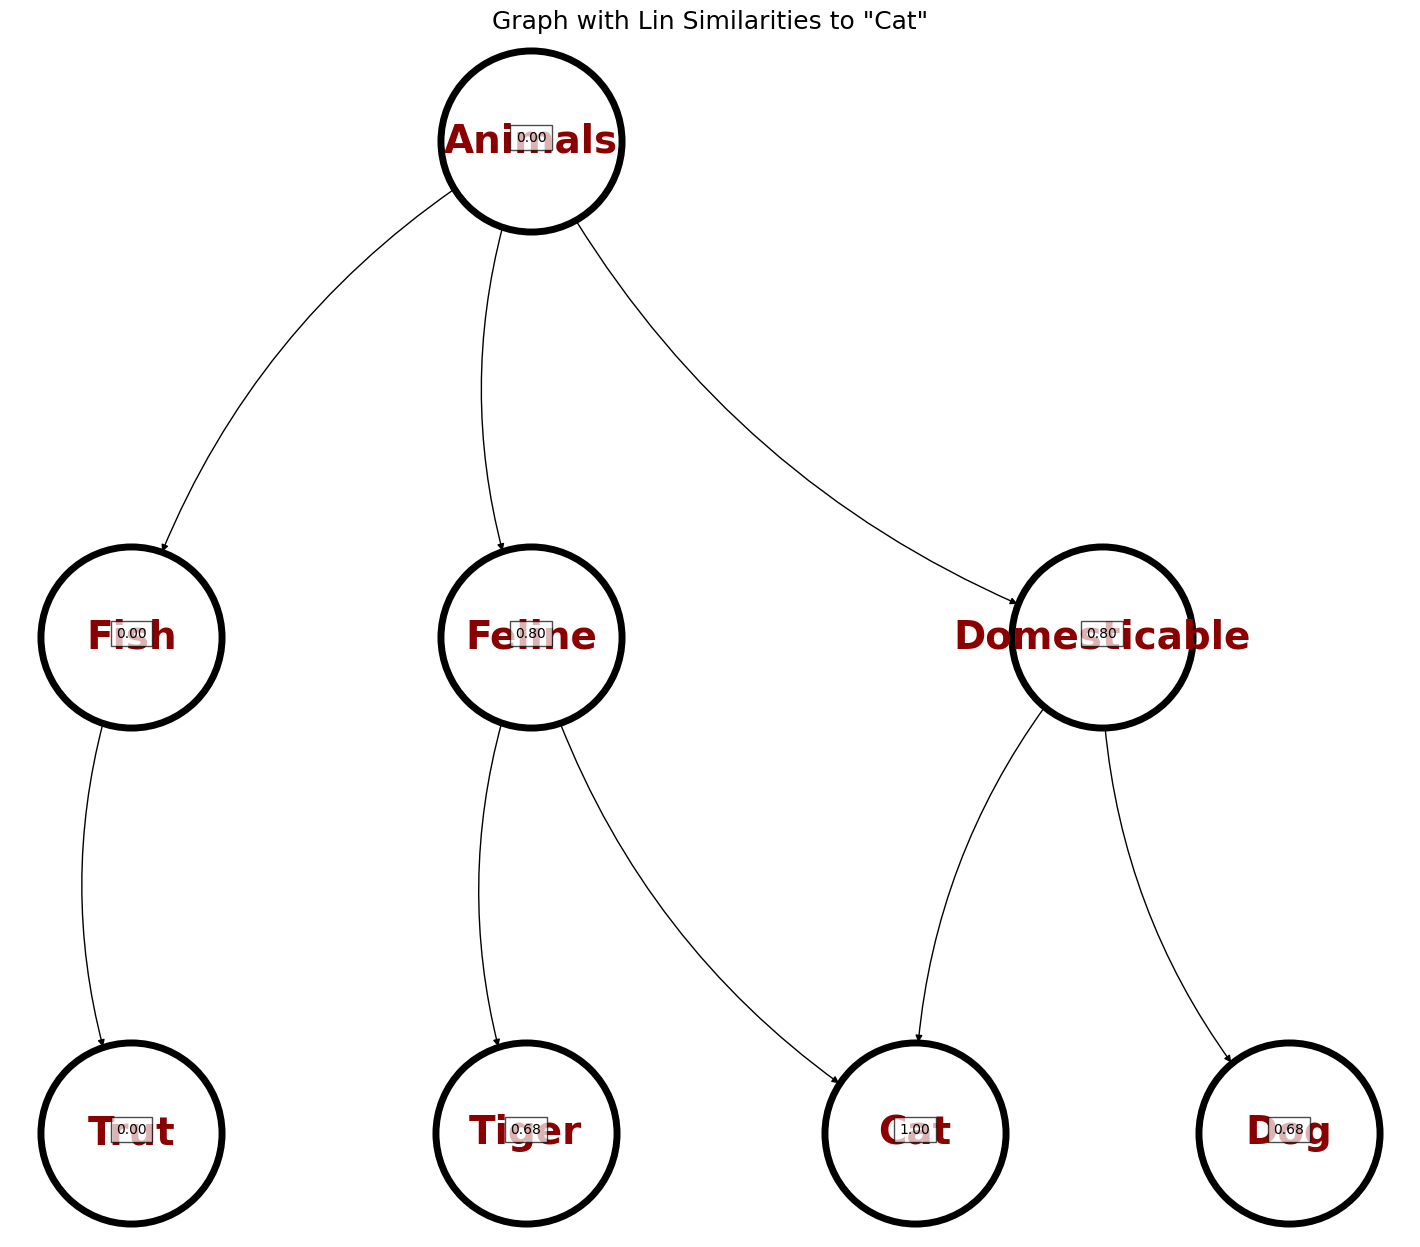

In [25]:
# Génération de la disposition en arbre vertical avec Graphviz
pos = graphviz_layout(G, prog='dot')

# Affichage du graphe
plt.figure(figsize=(14, 12))

# Dessiner les nœuds et les arêtes courbes
nx.draw(G, pos, with_labels=False, node_size=17000, node_color='white', linewidths=5, edgecolors='black', arrows=True, connectionstyle='arc3,rad=0.2')

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=28, font_weight='bold', font_color='darkred')

# Ajouter les étiquettes de similarité
labels = {node: f'{similarity_dict[node]:.2f}' for node in similarity_dict if similarity_dict[node] is not None}
for node, (x, y) in pos.items():
    plt.text(x, y-0.05, s=labels.get(node, ''), bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='center', fontsize=10, color='black')

# Ajouter un titre
plt.title('Graph with Lin Similarities to "Cat"', fontsize=18)

# Supprimer les axes
plt.axis('off')

# Afficher le graphe
plt.show()

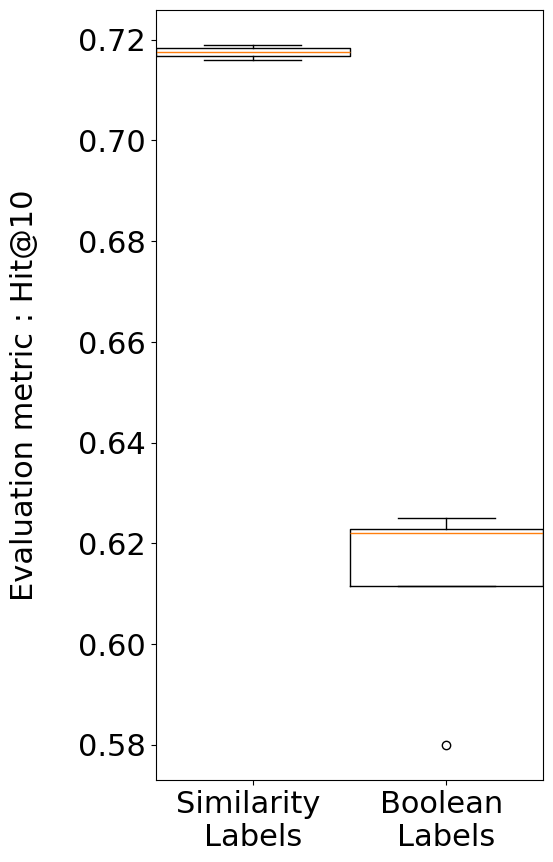

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Données
A = np.array([0.719, 0.718, 0.717, 0.716])
B = np.array([0.622, 0.625, 0.58, 0.622])

# Étiquettes
plt.rcParams.update({'font.size': 22})
labels = ['Similarity \nLabels', 'Boolean \nLabels']

# Calcul de la largeur des boîtes en fonction du nombre de boîtes et de l'espacement
num_boxes = len(labels)
box_width = 1 # Largeur des boîtes (ajustez selon votre préférence)

# Calcul de la largeur totale de la figure en fonction de la largeur des boîtes
total_width = num_boxes * box_width

# Ajustement de la taille de la figure
plt.figure(figsize=(5, 10))  # Ajoutez un peu d'espace supplémentaire (ici 2 pouces) autour des boîtes

# Création du boxplot avec la largeur des boîtes spécifiée
plt.boxplot([A, B], labels=labels, widths=box_width)
plt.ylabel('Evaluation metric : Hit@10\n')

# Affichage
plt.show()


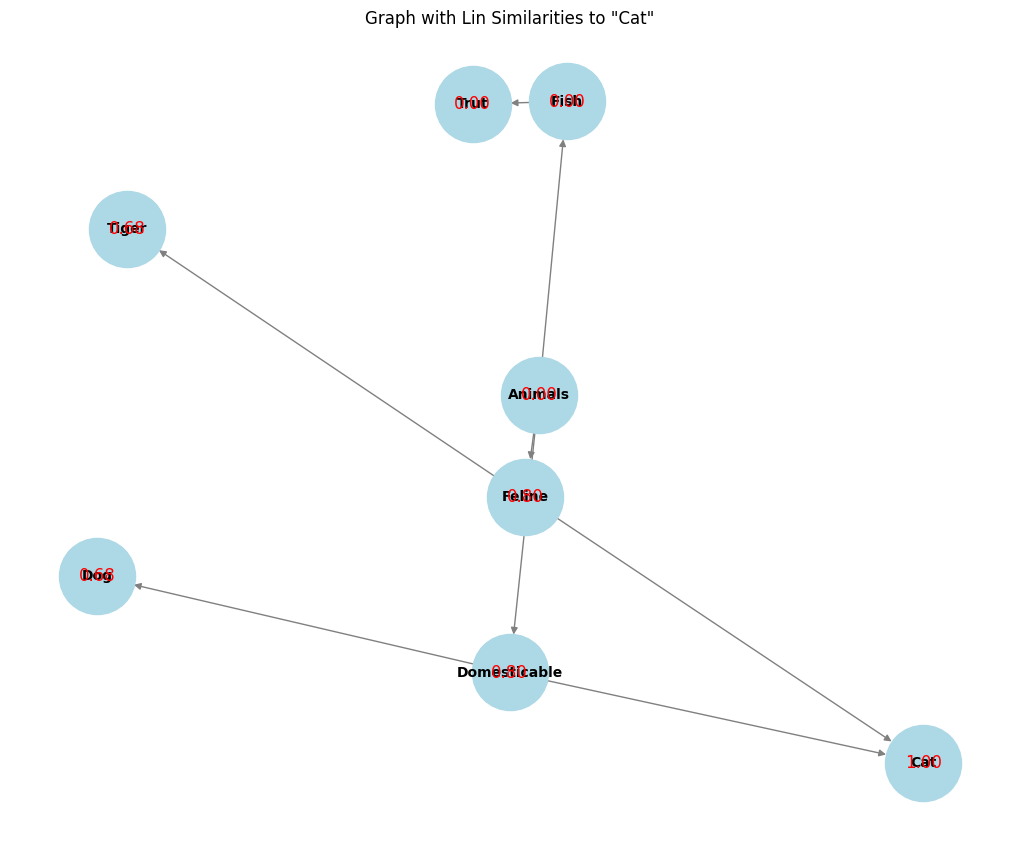

In [14]:
import networkx as nx
import nxontology
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()
nodes = ['Animals', 
         'Fish', 'Feline', 'Domesticable',
         'Dog','Cat','Tiger', 'Trut']
edges = [('Animals','Fish'), ('Animals','Feline'), ('Animals','Domesticable'),
         ('Fish','Trut'), ('Domesticable','Dog'), ('Domesticable','Cat'), ('Feline','Cat'), ('Feline', 'Tiger')]
[G.add_node(node) for node in nodes]

G.add_edges_from(edges)

# Création de l'ontologie
tree = nxontology.NXOntology(G)

# Calcul de la lin-similarité pour chaque nœud par rapport à 'Cat' et stockage dans un dictionnaire
similarity_dict = {node: tree.similarity('Cat', node).lin for node in nodes}

# Affichage du graphe
pos = nx.spring_layout(G)  # Positions des nœuds

plt.figure(figsize=(10, 8))

# Dessiner les nœuds et les arêtes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')

# Ajouter les étiquettes de similarité
labels = {node: f'{similarity_dict[node]:.2f}' for node in similarity_dict if similarity_dict[node] is not None}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='red')

plt.title('Graph with Lin Similarities to "Cat"')
plt.show()
